In [1]:
import string
import random
import os
import pprint
import json
import requests
import urllib.request
import pyttsx3

In [2]:
media_path = "../media/"
audio_path = "../audio/"
clips_path = "../clips/"
SIZE = (1080,1920)

### Download pexels video

In [3]:
# specify the URL of the archive here
archive_url = 'https://www.pexels.com/video/aerial-footage-of-the-palace-of-culture-and-science-building-in-warsaw-poland-7312218/'
pexel_video_id = int(archive_url.replace("/", "").split("-")[-1])
print(archive_url.split("/")[-2])
print(f'pexel_video_id: {pexel_video_id}')

aerial-footage-of-the-palace-of-culture-and-science-building-in-warsaw-poland-7312218
pexel_video_id: 7312218


In [4]:
PEXEL_API_KEY = '563492ad6f917000010000011d2a823f8f9f41ecbd8ed2f5bcc381ab'
url = ' https://api.pexels.com/videos/videos/'

# payload = {'id': 8035714}
params = {'id': pexel_video_id}
headers = {'content-type': 'application/json',
           'Authorization': PEXEL_API_KEY, 
          }

response = requests.get(f'{url}{8035714}', headers=headers)
resp = json.loads(response.text)
pprint.pprint(resp)

{'avg_color': None,
 'duration': 12,
 'full_res': None,
 'height': 3840,
 'id': 8035714,
 'image': 'https://images.pexels.com/videos/8035714/4k-video-architecture-backlit-beach-8035714.jpeg?auto=compress&cs=tinysrgb&fit=crop&h=1200&w=630',
 'tags': [],
 'url': 'https://www.pexels.com/video/a-sunset-time-lapse-8035714/',
 'user': {'id': 3511482,
          'name': 'Polina Kovaleva',
          'url': 'https://www.pexels.com/@polina-kovaleva'},
 'video_files': [{'file_type': 'video/mp4',
                  'fps': 25.0,
                  'height': 1920,
                  'id': 3412845,
                  'link': 'https://player.vimeo.com/external/554200859.hd.mp4?s=98c39bed871985e82a70b170d0d1b45d4e883e7b&profile_id=175&oauth2_token_id=57447761',
                  'quality': 'hd',
                  'width': 1080},
                 {'file_type': 'video/mp4',
                  'fps': 25.0,
                  'height': 3840,
                  'id': 3412846,
                  'link': 'https://play

In [5]:
v_files = resp['video_files']
v_link = ""
v_links = [v["link"] for v in v_files]
for v in v_files:
    if v["quality"] == "hd" and v["width"] == 1080:
        v_link = v["link"]
        
# pprint.pprint(v_links)
print(v_link)

https://player.vimeo.com/external/554200859.hd.mp4?s=98c39bed871985e82a70b170d0d1b45d4e883e7b&profile_id=175&oauth2_token_id=57447761


In [6]:
bg_clip_file = 'bg_clip.mp4'
urllib.request.urlretrieve(v_link, media_path + "backgrounds/" + 'bg_clip.mp4') 
#bg_clip_file = "string_press.mp4"

('../media/backgrounds/bg_clip.mp4',
 <http.client.HTTPMessage at 0x7ff3426b9240>)

In [7]:
import numpy as np
import moviepy.editor as mpy
import moviepy.video.fx as vfx
from moviepy.video.VideoClip import ImageClip, TextClip
from moviepy.video.compositing import CompositeVideoClip
from moviepy.video.compositing.CompositeVideoClip import *
from moviepy.editor import *
from effects import *
from gtts_util import *

from gtts import gTTS
import cv2
import skimage.filters


print("np version {}".format(np.__version__))
print("cv2 version {}".format(cv2.__version__))
print("skimage version {}".format(skimage.__version__))

np version 1.19.5
cv2 version 4.1.2
skimage version 0.17.2


In [58]:
# Audio
from moviepy.audio.fx.all import *

music_file = "paris.mp3" #"blade_runner_synth.mp3"
music = mpy.AudioFileClip(audio_path + music_file)
#music = music.subclip(4, None)
print(f"duration: {music.duration}s")
#music.preview()

duration: 209.76s


Downloaded background clip
Width: 1080, Height 1920, fps: 25.0, duration: 12.24s



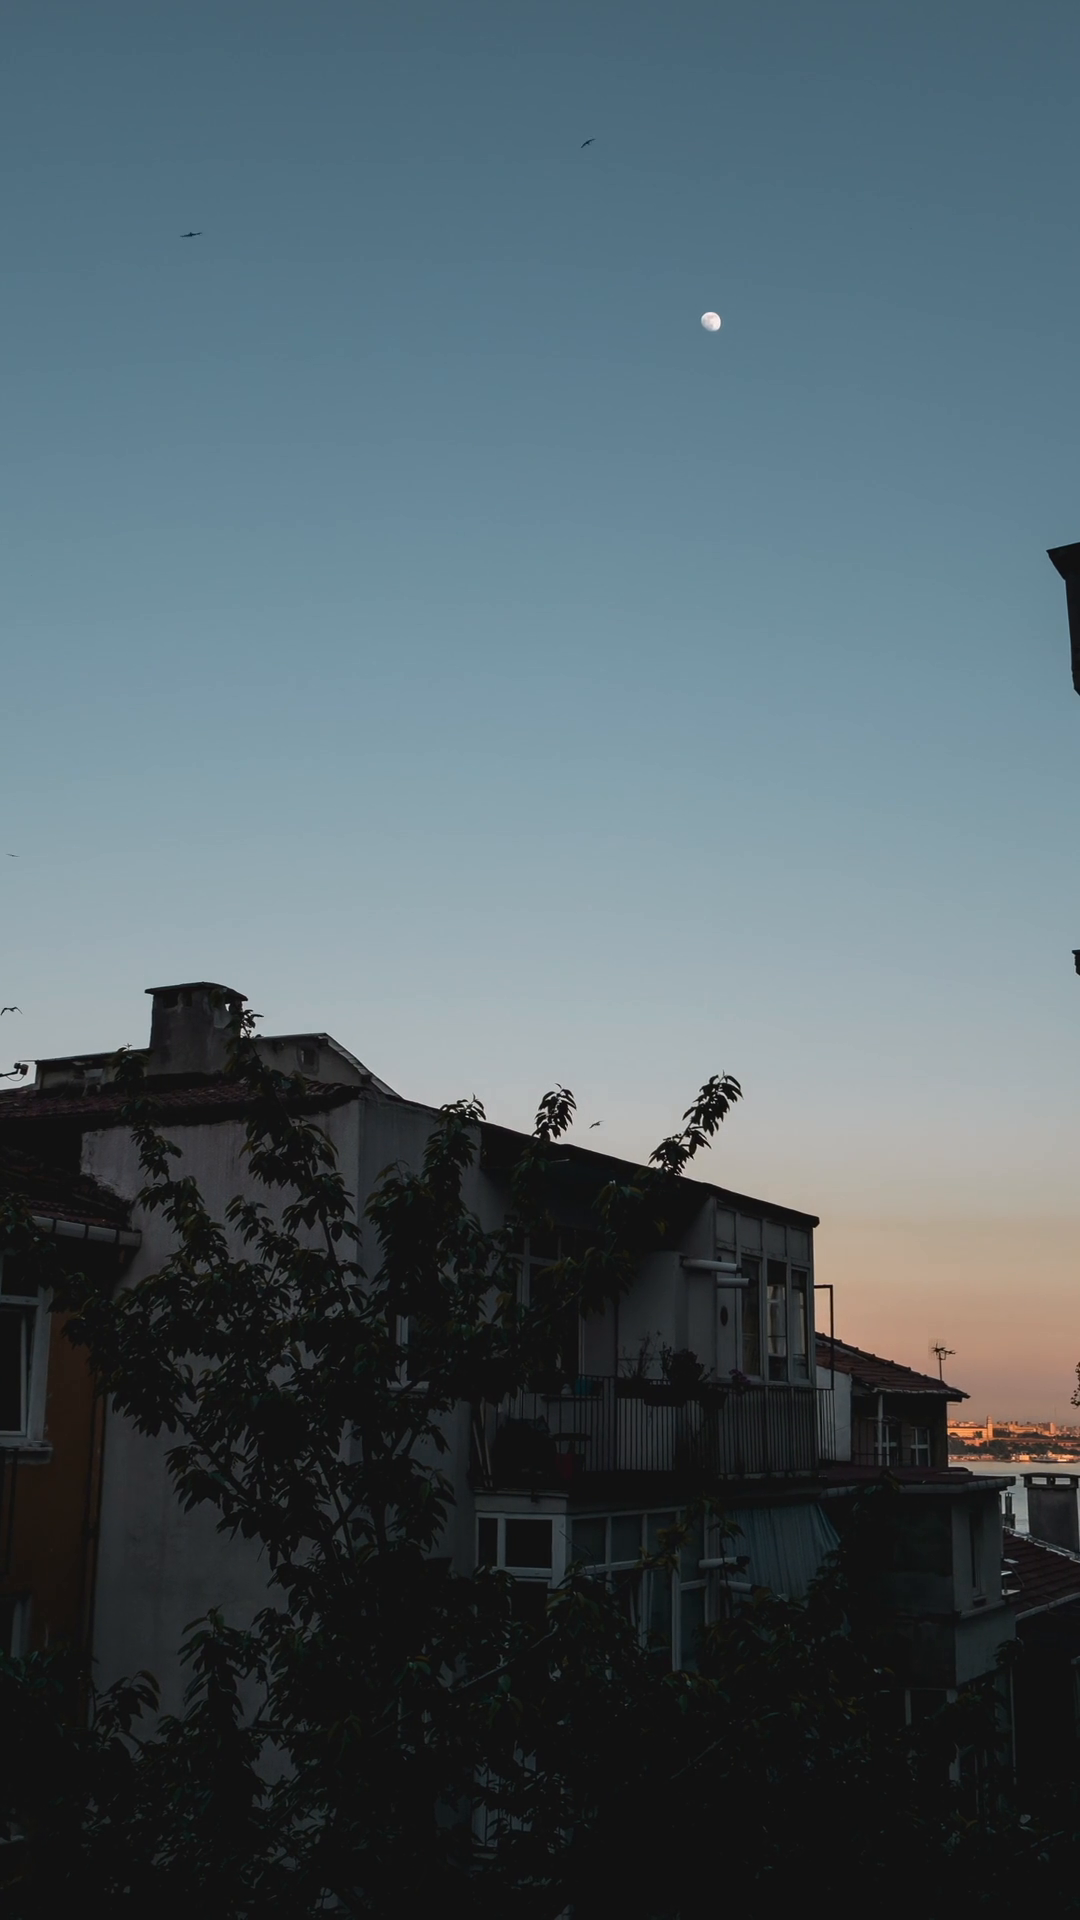

In [9]:
# Open the background clip file
select_random_start = False
bg_clip = mpy.VideoFileClip(media_path + "backgrounds/" + bg_clip_file)

fps = bg_clip.fps
width, height = bg_clip.size
duration = bg_clip.duration

print("Downloaded background clip")
print(f"Width: {width}, Height {height}, fps: {fps}, duration: {duration}s")

# Processing
bg_clip = bg_clip.without_audio()
if select_random_start:
    bg_clip = bg_clip.subclip(random.random()*(bg_clip.duration-60))
bg_clip = bg_clip.fx(vfx.make_loopable, 1).fx(vfx.loop)


bg_clip.ipython_display(t = 0, width = 300)

In [10]:
#TextClip.list('font')
#TextClip.list('color')

In [54]:
texts = ["Scary facts that will keep you awake",
         "Dead skin cells are a main ingredient in household dust.",
         "There are over 250,000 deaths a year due to medical error.", 
         "There's a 1-in-3 chance police will never identify your killer if you're murdered in the US."]
text_clips = []
title_is_first = True

for i, t in enumerate(texts):
    size = 78
    bg_color = "transparent"
    color = "white" 
    stroke_width = 3
    stroke_color = "black"
    font='proximanova-extrabold'
    kerning=-4,
    if i == 0 and title_is_first:
        size = 103
        bg_color = "AntiqueWhite"
        color = "black"
        stroke_width = 3
        stroke_color = "black"
        font='proximanova-semibold'
        kerning=-2,
    text_width = width-200             
    t_clip = TextClip(txt = t, 
                    size=(text_width, None), # Height will be auto-determined
                    color=color, 
                    bg_color=bg_color,
                    fontsize=size, 
                    font=font,# 'Helvetica-Bold''ArialUnicode',
                    stroke_color=stroke_color, 
                    stroke_width=stroke_width, 
                    method='caption', 
                    kerning=kerning, 
                    align='center')
    text_height = t_clip.size[1]
    
    # Add speech
    #speech = gTTS(t, lang='en') #tld='co.uk')
    #speech.save(audio_path + f"speech_{i}.mp3")
    #speech_clip = mpy.AudioFileClip(audio_path + f"speech_{i}.mp3")
    #os.remove(audio_path + f"speech_{i}.mp3")
    
    gtts_client = get_authenticated_tts_client()
    speech_clip = google_text_to_speech(
                    gtts_client, t, file_path = audio_path + f"speech_{i}.mp3", 
                    voice_name ="en-US-Neural2-D" #"en-US-Wavenet-B", #"en-US-Studio-M"
                    )
    
    
    # Add a 1 second pause at the end of each speech clip
    empty_clip = AudioClip(lambda t: 0, duration=0.75)
    speech_clip = concatenate_audioclips([speech_clip, empty_clip]).set_fps(44100)
    t_clip = t_clip.set_audio(speech_clip).set_duration(speech_clip.duration)
   
    # Add effects
    #t_clip = t_clip.fx(vfx.fadeout, 0.5)
    t_clip = t_clip.set_opacity(1)

    # Add text to 1080x1920 transparent background
    empty_bg = ColorClip(SIZE, color=(0, 0, 0)).set_opacity(0)
    t_clip = t_clip.set_position(("center", 0.2*height))
    t_clip = CompositeVideoClip([empty_bg, t_clip], use_bgclip = True)
    text_clips.append(t_clip)
    
    
text_clip = mpy.concatenate_videoclips(text_clips, method = "compose", padding = 0.5)#.set_fps(fps)

text_clip.audio = text_clip.audio.set_fps(44100)
print(f"text clip duration {text_clip.duration}")
print(text_clip.audio.duration)

text clip duration 22.1
22.1


In [47]:
# Keep fps low or it will be slowed down
text_clip.preview(fps=5, audio = True)

Interrupt


[]

In [43]:
#text_clip.set_position(("center",height*0.6)).preview(fps = 25)

time, position, color :  1.480, (302, 258), [250 235 215]
Interrupt


[{'color': array([250, 235, 215], dtype=uint8),
  'position': (302, 258),
  'time': 1.48}]

In [61]:
# Combine text clip with background video

# Make background clip loopable in case the text is longer
final_bg_clip = bg_clip.copy()
#final_bg_clip = final_bg_clip.fx(vfx.time_symmetrize)
print("final_bg_clip duration {}".format(final_bg_clip.duration))

clip = CompositeVideoClip([final_bg_clip, text_clip], use_bgclip = True)
print("composite clip duration {}".format(clip.duration))

# Add music to clip
clip_music = music.fx(volumex, 0.65).set_duration(clip.duration).fx(audio_fadein, 0.5)
comp_audio = mpy.CompositeAudioClip([clip_music, clip.audio.fx(volumex, 1.2)])
comp_audio = comp_audio.set_duration(clip.duration).set_fps(44100)
clip = clip.set_audio(comp_audio)

print("final_clip duration {}".format(clip.duration))
print(clip.fps)
print("final clip size: {}".format(clip.size))

final_bg_clip duration None
composite clip duration 22.1
final_clip duration 22.1
25.0
(1080, 1920)


In [62]:
# Keep fps low or it will be slowed down
clip.preview(fps=5, audio = True)

In [27]:
clip.write_videofile(clips_path + "test.mp4", audio_codec='aac')

chunk:   4%|▍         | 18/445 [00:00<00:02, 177.53it/s, now=None]

Moviepy - Building video ../clips/test.mp4.
MoviePy - Writing audio in testTEMP_MPY_wvf_snd.mp4



t:   0%|          | 0/503 [00:00<?, ?it/s, now=None]

MoviePy - Done.
Moviepy - Writing video ../clips/test.mp4




t:  25%|██▌       | 126/503 [00:28<01:28,  4.25it/s, now=None]


t:  50%|████▉     | 250/503 [00:56<01:00,  4.15it/s, now=None]


t:  74%|███████▍  | 374/503 [01:36<00:30,  4.23it/s, now=None]


t:  99%|█████████▉| 498/503 [02:05<00:01,  4.30it/s, now=None]


t:  59%|█████▉    | 289/491 [05:01<01:01,  3.27it/s, now=None]

Moviepy - Done !
Moviepy - video ready ../clips/test.mp4


In [147]:
# clip.preview(fps = fps)

time, position, color :  0.400, (47, 1520), [32 22 16]
time, position, color :  0.440, (47, 1520), [30 23 16]
time, position, color :  0.480, (47, 1520), [30 23 18]


In [11]:
# Save the output video file
# blurred_clip.write_videofile(f"../media/blurred_mpy_{video_file}")

In [152]:
import numpy as np

from moviepy.editor import *
from moviepy.video.tools.segmenting import findObjects

# WE CREATE THE TEXT THAT IS GOING TO MOVE, WE CENTER IT.

screensize = (1080,1920)
txtClip = TextClip('Cool effect',color='white', font="Amiri-Bold",
                   kerning = 5, fontsize=100)
cvc = CompositeVideoClip( [txtClip.set_position('center')],
                        size=screensize)

# THE NEXT FOUR FUNCTIONS DEFINE FOUR WAYS OF MOVING THE LETTERS


# helper function
rotMatrix = lambda a: np.array( [[np.cos(a),np.sin(a)], 
                                 [-np.sin(a),np.cos(a)]] )

def vortex(screenpos,i,nletters):
    d = lambda t : 1.0/(0.3+t**8) #damping
    a = i*np.pi/ nletters # angle of the movement
    v = rotMatrix(a).dot([-1,0])
    if i%2 : v[1] = -v[1]
    return lambda t: screenpos+400*d(t)*rotMatrix(0.5*d(t)*a).dot(v)
    
def cascade(screenpos,i,nletters):
    v = np.array([0,-1])
    d = lambda t : 1 if t<0 else abs(np.sinc(t)/(1+t**4))
    return lambda t: screenpos+v*400*d(t-0.15*i)

def arrive(screenpos,i,nletters):
    v = np.array([-1,0])
    d = lambda t : max(0, 3-3*t)
    return lambda t: screenpos-400*v*d(t-0.2*i)
    
def vortexout(screenpos,i,nletters):
    d = lambda t : max(0,t) #damping
    a = i*np.pi/ nletters # angle of the movement
    v = rotMatrix(a).dot([-1,0])
    if i%2 : v[1] = -v[1]
    return lambda t: screenpos+400*d(t-0.1*i)*rotMatrix(-0.2*d(t)*a).dot(v)



# WE USE THE PLUGIN findObjects TO LOCATE AND SEPARATE EACH LETTER

letters = findObjects(cvc) # a list of ImageClips
print(letters[0].screenpos)

# WE ANIMATE THE LETTERS

def moveLetters(letters, funcpos):
    return [ letter.set_position(funcpos(letter.screenpos,i,len(letters)))
              for i,letter in enumerate(letters)]

clips = [ CompositeVideoClip( moveLetters(letters,funcpos),
                              size = screensize).subclip(0,5)
          for funcpos in [vortex, cascade, arrive, vortexout] ]

# WE CONCATENATE EVERYTHING AND WRITE TO A FILE

#final_clip = concatenate_videoclips(clips)
#final_clip.write_videofile('../../coolTextEffects.avi',fps=25,codec='mpeg4')

[277 911]


In [163]:
from effects import *

In [34]:
# from moviepy.video.tools.drawing import circle
texts = ["Crazy facts you need to know (Pt.1) but it gets longer", "A shrimp's heart is in it's head.", "Ronaldo is better than Messi.", "A boxer can run at 35 mph and this is very long"]
text_clips = []
title_is_first = True
effect_clip = None

# per-letter effects (buggY)
letter_effects = [ None for _ in texts]
#letter_effects[0] = vortexout

# text box effects
text_effects = [ None for _ in texts]
#text_effects[0] = cascade
#text_effects[1] = arrive

for i, t in enumerate(texts):
    size = 75
    bg_color = "transparent"
    color = "white" 
    stroke_width = 2.5
    stroke_color = "black"
    if i == -1 and title_is_first:
        size = 82
        bg_color = "white"
        color = "black"
        stroke_width = 2
        stroke_color = "white"
        
    text_width = width-175             
    t_clip = TextClip(txt = t, 
                    size=(text_width, None), # Height will be auto-determined
                    color=color, 
                    bg_color=bg_color,
                    fontsize=size, 
                    font='Helvetica-Bold',#'ArialUnicode',#'ArialUnicode',#'Segoe-UI-Emoji',#'Courier', 
                    stroke_color=stroke_color, 
                    stroke_width=1, 
                    #method='caption', 
                    kerning=-3)#, 
                    #align='center')
    text_height = t_clip.size[1]
    
    # Add speech
    #speech = gTTS(t, lang='en') #tld='co.uk')
    #speech.save(audio_path + "speech.mp3")
    #speech_clip = mpy.AudioFileClip(audio_path + "speech.mp3")#.set_duration(speech_clip.duration + 1)
    
    gtts_client = get_authenticated_tts_client()
    speech_clip = google_text_to_speech(gtts_client, t, file_path = audio_path + "speech.mp3")
    
    
    # Add a 0.5 second pause at the end of each speech clip
    empty_clip = AudioClip(lambda t: 0, duration=0.5)
    speech_clip = concatenate_audioclips([speech_clip, empty_clip]).set_fps(44100)
    t_clip = t_clip.set_audio(speech_clip).set_duration(speech_clip.duration)
   
    # Add effects
    #t_clip = t_clip.fx(vfx.fadeout, 0.5)
    t_clip = t_clip.set_opacity(1)
    
    # Add cool effects to text
    cvc = CompositeVideoClip([t_clip.set_position(("center",height*0.25))], size=screensize)
    letters = findObjects(cvc)
    print(len(letters))
    
    if letter_effects[i] is not None:
        effect_clip = CompositeVideoClip(moveLetters(letters,cascade), size = screensize).subclip(0,5)
        t_clip = effect_clip
        #effect_clip = effect_clip.set_audio(speech_clip).set_duration(speech_clip.duration)
   
    # Set text position for composition and add effect if specified
    pos = (80, height*0.25)
    t_clip = t_clip.set_position(pos)
    if text_effects[i] is not None:
        effect = text_effects[i]
        t_clip = t_clip.set_position(effect(pos,0,0))
    
    # Add 1080x1920 background
    t_clip = CompositeVideoClip([ColorClip(SIZE, color=(0, 0, 0)).set_opacity(0), t_clip], use_bgclip = True)
    text_clips.append(t_clip)
    
    
text_clip = mpy.concatenate_videoclips(text_clips, method = "compose", padding = 0.5)#.set_fps(fps)
text_clip.audio = text_clip.audio.set_fps(44100)
print(f"text clip duration {text_clip.duration}")

NameError: name 'width' is not defined

In [159]:
text_clip.preview(fps=5)

In [ ]:
# Make background clip loopable in case the text is longer
final_bg_clip = bg_clip.copy()
#final_bg_clip = final_bg_clip.fx(vfx.time_symmetrize)
print("final_bg_clip duration {}".format(final_bg_clip.duration))


clip = CompositeVideoClip([final_bg_clip, text_clip.set_position(("center",0.17), relative=True)], use_bgclip = True)
print("composite clip duration {}".format(clip.duration))


# Add music to clip
music = music.fx(volumex, 0.65).set_duration(clip.duration).fx(audio_fadein, 0.5)
comp_audio = mpy.CompositeAudioClip([music, clip.audio.fx(volumex, 1.1)])
comp_audio = comp_audio.set_duration(clip.duration).set_fps(44100)
clip = clip.set_audio(comp_audio)

print("final_clip duration {}".format(clip.duration))
print(clip.fps)
print(clip.size)

In [182]:
a = '''background_clip = ColorClip((1080, 1920), color=(0, 0, 0))
composite_clip = CompositeVideoClip([background_clip, scroll])
composite_clip = composite_clip.set_duration(scroll.duration)
composite_clip.audio = composite_clip.audio.set_fps(44100)
composite_clip.preview(fps=5)'''

In [157]:
clip.write_videofile(media_path + "coo_effects.mp4",fps=25,codec='mpeg4')

chunk:   7%|▋         | 33/453 [00:00<00:01, 300.54it/s, now=None]

Moviepy - Building video ../media/coo_effects.mp4.
MoviePy - Writing audio in coo_effectsTEMP_MPY_wvf_snd.mp3


t:   0%|          | 0/512 [00:00<?, ?it/s, now=None]               

MoviePy - Done.
Moviepy - Writing video ../media/coo_effects.mp4



Moviepy - Done !
Moviepy - video ready ../media/coo_effects.mp4


### One word at a time

In [260]:
# Exploding title words
# Create a function that will take a word as input and return an mpy.TextClip
# object that shows onto the screen and has audio of the word being spoken
# using gTTS
def create_word_text_clip(word):
    # Create a TextClip object with the given word and a white color
    size = 75
    bg_color = "transparent"
    color = "white" 
    stroke_width = 2.5
    stroke_color = "black"
    text_clip_word = TextClip(txt = word, 
                    size=(text_width, None), # Height will be auto-determined
                    color="white", 
                    bg_color=bg_color,
                    fontsize=size, 
                    font='Helvetica-Bold',#'ArialUnicode',#'ArialUnicode',#'Segoe-UI-Emoji',#'Courier', 
                    stroke_color=stroke_color, 
                    stroke_width=stroke_width, 
                    method='caption', 
                    kerning=-3, 
                    align='center')

    # Use gTTS to generate audio for the given word
    speech = gTTS(word, slow = False)
    speech.save(audio_path + "speech.mp3")
    speech_clip = mpy.AudioFileClip(audio_path + "speech.mp3")
    
    speech_clip = speech_clip#.fx(vfx.speedx, 1)
    # Set the audio for the TextClip
    text_clip_word = text_clip_word.set_audio(speech_clip).set_duration(speech_clip.duration)

    # Use moviepy's compositing functionality to create an exploding effect
    # for the TextClip by setting the growth parameter to a high value
    text_clip_word = text_clip_word.set_position('center').set_duration(text_clip_word.duration).set_opacity(1).set_start(0)
    #text_clip_explode = text_clip_word.fx(mpy.vfx.composite, 'Explosion', growth=500, color=[255, 255, 255])

    # Return the final TextClip with the exploding effect and audio
    return text_clip_word

sentence = "Crazy facts you need to know right now! (Pt1)"
words = sentence.split(" ")

# Create a list of TextClip objects for each word
word_clips = [create_word_text_clip(word) for word in words]

# Use moviepy's concatenate function to join the TextClip objects into a single
# video clip
title_clip = concatenate_videoclips(word_clips)
title_clip.audio = title_clip.audio.set_fps(44100)

print(f"title clip duration {title_clip.duration}")
# Write the video clip to a file
#final_clip.write_videofile('output.mp4', fps=24)

KeyboardInterrupt: 

In [ ]:
title_clip.preview(fps=5)

In [65]:
word_clips

### Upload to youtube

In [9]:
# Get all the clips 
clip_files = sorted(os.listdir('../clips/'))
clip_file = "../clips/" + clip_files[3]
print(f"Video to upload: {clip_file}")

Video to upload: ../clips/black_bg_clip1_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4


In [159]:
import upload_video
import youtube

In [2]:
from googleapiclient.discovery import build
from apiclient.http import MediaFileUpload
import google.oauth2.credentials
# from oauth2client.client import flow_from_clientsecrets
import json 

In [3]:
## Datetime exploration

import datetime
# Get the current date and time
now = datetime.datetime.now()

# Calculate tomorrow's date by adding one day to the current date
tomorrow = now + datetime.timedelta(days=1)

# Create a datetime object for December 27th, 2022 at 12:00 AM
specific_datetime = datetime.datetime(2022, 12, 23, 19, 0)

# Convert the date and time to ISO 8601 format
iso_datetime = specific_datetime.isoformat()

print(iso_datetime)

2022-12-23T19:00:00


In [160]:
# Create a YouTube service object
youtube = upload_video.get_authenticated_service()

SystemExit: The client secrets were invalid: 
('Error opening file', 'client_secrets_1.json', 'No such file or directory', 2)

WARNING: Please configure OAuth 2.0

To make this sample run you will need to populate the client_secrets.json file
found at:

   /Users/rohanmirchandani/Desktop/Automation/src/client_secrets_1.json

with information from the API Console
https://console.cloud.google.com/

For more information about the client_secrets.json file format, please visit:
https://developers.google.com/api-client-library/python/guide/aaa_client_secrets


/Users/rohanmirchandani/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [10]:
CHANNEL_ID="UCuvWt72OMRF5xp6H9VBdmLw"
OWNER_ID="uvWt72OMRF5xp6H9VBdmLw"

In [11]:
# Set the video file and metadata
title = 'Neymar Jr crazy skills 🔥 #shorts #neymarjr #football'
description = 'Neymar Jr skills and tricks #shorts'
tags = ['shorts', 'soccer', 'neymarjr']

# Create the request body
request_body = {
    'snippet': {
        'title': title,
        'description': description,
        'tags': tags
    },
    'status': {
        'privacyStatus': 'public', # private, unlisted
        # 'publishAt':  iso_datetime  # can be set if privacyStatus=private
        'selfDeclaredMadeForKids' : False,
       
    }
}

# Create the request
request = youtube.videos().insert(
    part=",".join(request_body.keys()),
    body=request_body,
    media_body=MediaFileUpload(clip_file, mimetype='video/mp4', resumable=True),
    onBehalfOfContentOwnerChannel=CHANNEL_ID,
    onBehalfOfContentOwner=OWNER_ID
)

pprint.pprint(json.loads(request.to_json()))

{'_in_error_state': False,
 'body': '{"snippet": {"title": "Neymar Jr crazy skills \\ud83d\\udd25 #shorts '
         '#neymarjr #football", "description": "Neymar Jr skills and tricks '
         '#shorts", "tags": ["shorts", "soccer", "neymarjr"]}, "status": '
         '{"privacyStatus": "public", "selfDeclaredMadeForKids": false}}',
 'body_size': 258,
 'headers': {'accept': 'application/json',
             'accept-encoding': 'gzip, deflate',
             'content-type': 'application/json',
             'user-agent': '(gzip)',
             'x-goog-api-client': 'gdcl/2.52.0 gl-python/3.6.10'},
 'method': 'POST',
 'methodId': 'youtube.videos.insert',
 'response_callbacks': [],
 'resumable': '{"_filename": '
              '"../clips/black_bg_clip1_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4", '
              '"_mimetype": "video/mp4", "_chunksize": 104857600, '
              '"_resumable": true, "_size": 2055269, "_class": '
              '"MediaFileUpload", "_module": "goog

In [12]:
# Execute the request
response = upload_video.resumable_upload(request)

# Print the response
print(response)

Uploading file...


ResumableUploadError: <HttpError 403 when requesting None returned "The request cannot be completed because you have exceeded your <a href="/youtube/v3/getting-started#quota">quota</a>.". Details: "[{'message': 'The request cannot be completed because you have exceeded your <a href="/youtube/v3/getting-started#quota">quota</a>.', 'domain': 'youtube.quota', 'reason': 'quotaExceeded'}]">

In [190]:
video_id = response['id']

TypeError: 'NoneType' object is not subscriptable

In [123]:
# video_id = response['id']


#Note: shorts cannot have thumbnails
video_id = "gLW72MEqhZs"
thumbnail_file = "../media/images/Sparkle.png"
r = youtube.thumbnails().set(
    videoId=video_id,
    media_body=MediaFileUpload(thumbnail_file, mimetype='image/png'))
# r.execute()

{'etag': 'rmCN4BS7mUeeTQMzCZyPJhh-RFk',
 'items': [{'default': {'height': 90,
    'url': 'https://i9.ytimg.com/vi/gLW72MEqhZs/default.jpg?sqp=CNTtnp0G&rs=AOn4CLAhpABHM0GmX8SZNbRi-srS73lsbQ',
    'width': 120},
   'high': {'height': 360,
    'url': 'https://i9.ytimg.com/vi/gLW72MEqhZs/hqdefault.jpg?sqp=CNTtnp0G&rs=AOn4CLDNL10sUmEy2fF8z5VEkRXr6AOrjA',
    'width': 480},
   'maxres': {'height': 720,
    'url': 'https://i9.ytimg.com/vi/gLW72MEqhZs/maxresdefault.jpg?sqp=CNTtnp0G&rs=AOn4CLDbXTyRqqRH88vzkqV_Q6YwObzDMA',
    'width': 1280},
   'medium': {'height': 180,
    'url': 'https://i9.ytimg.com/vi/gLW72MEqhZs/mqdefault.jpg?sqp=CNTtnp0G&rs=AOn4CLCu5HhE17nlS6DLVtCkEnkSiFfwnw',
    'width': 320},
   'standard': {'height': 480,
    'url': 'https://i9.ytimg.com/vi/gLW72MEqhZs/sddefault.jpg?sqp=CNTtnp0G&rs=AOn4CLDFkRF6ratZ9dvMEDJJ-NGeob5ceA',
    'width': 640}}],
 'kind': 'youtube#thumbnailSetResponse'}

### Google Text to speech API 

In [17]:
gtts_client = get_authenticated_tts_client_test()
speech = google_text_to_speech_test(gtts_client, "Mind-blowing facts you've never heard before")
speech.preview()

In [16]:
### Google speech API
from google.cloud import texttospeech
from google.oauth2 import service_account

def get_authenticated_tts_client_test():
    try: 
        credentials = service_account.Credentials.from_service_account_file(
        'gc_service_account_key.json')

        scoped_credentials = credentials.with_scopes(
            ['https://www.googleapis.com/auth/cloud-platform'])

        # Instantiates a client
        client = texttospeech.TextToSpeechClient(credentials=scoped_credentials)
        return client
    except:
        print("Error authenticating to google text to speech API")

    

def google_text_to_speech_test(client, text):
    # Set the text input to be synthesized
    synthesis_input = texttospeech.SynthesisInput(text=text)

    # Build the voice request, select the language code ("en-US") and the ssml
    # voice gender ("neutral")
    voice = texttospeech.VoiceSelectionParams(
        #language_code=language_code, ssml_gender=texttospeech.SsmlVoiceGender.NEUTRAL
        name="en-US-Neural2-D",
        language_code="en-US",
    )

    # Select the type of audio file you want returned
    audio_config = texttospeech.AudioConfig(
        audio_encoding=texttospeech.AudioEncoding.MP3
    )

    # Perform the text-to-speech request on the text input with the selected
    # voice parameters and audio file type
    response = client.synthesize_speech(
        input=synthesis_input, voice=voice, audio_config=audio_config
    )

    # The response's audio_content is binary.
    with open(media_path+"speech.mp3", "wb") as out:
        # Write the response to the output file.
        out.write(response.audio_content)
        #print('Audio content written to file "output.mp3"')
    
    snd = AudioFileClip(media_path+"speech1.mp3", fps = 44100)
    return snd
    

In [19]:
!pip install --upgrade google-cloud-texttospeech

In [ ]:
 ### G

In [132]:
from moviepy.video.tools.segmenting import find_video_period
from moviepy.video.VideoClip import TextClip, CompositeVideoClip

# Create the text clip
text = "Example Text"
text_clip = TextClip(text, fontsize=24, color='white')

# Create the circle clip
circle_clip = text_clip.on_color(size=(text_clip.w + 20, text_clip.h + 20),
                                 color=(0, 0, 0), pos=(0, 0), col_opacity=1)

# Define the expanding circle mask
final_radius = max(text_clip.w, text_clip.h) / 2 + 10
circle_mask = circle_clip.mask_circle(final_radius)

# Apply the mask to the text clip
text_clip = text_clip.set_mask(circle_mask)

# Create the composite clip
composite_clip = CompositeVideoClip([circle_clip, text_clip])

# Set the duration of the clip
duration = find_video_period(text_clip)
composite_clip = composite_clip.set_duration(duration)

ImportError: cannot import name 'find_video_period'

###  OpenCV 

In [ ]:
# Open the video file and get dimensions
video_capture = cv2.VideoCapture(video_path)
print(video_capture)

width = video_capture.get(cv2.CAP_PROP_FRAME_WIDTH)
height = video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
fps =  video_capture.get(cv2.CAP_PROP_FPS)
print(f"Width: {width}, Height {height}, fps: {fps}")

# Set the output video file
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
video_writer = cv2.VideoWriter(f"../media/blurred_{video_file}", fourcc, fps, (int(width), int(height)))

In [ ]:
# OpenCV
# Loop through each frame in the video
i = 0
while False:
    
    # Read the next frame
    success, frame = video_capture.read()

    # If there are no more frames, break out of the loop
    if not success:
        break

    # Blur a section of the frame
    # x1, y1, x2, y2 = calculate_blur_region((width, height), sc_size, top_left, bottom_right)
    frame[y1:y2, x1:x2] = cv2.blur(frame[y1:y2, x1:x2], (10, 10))

    # Write the frame to the output video file
    video_writer.write(frame)
    
    if i % 1000 == 0:
        print(f"frame {i}")
    i += 1

# Release the video capture and video writer objects
video_capture.release()
video_writer.release()